In [46]:
%matplotlib inline

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt

In [48]:
df = pd.read_csv('data/ex2data1.txt', names = ['X1', 'X2', 'Y'])

In [49]:
df

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [50]:
X = np.array(df[['X1','X2']])
Y = np.array(df['Y'])

In [51]:
np.where(Y==0)

(array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
        36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
        70, 78, 79, 86, 89, 92], dtype=int64),)

plt.legend(loc=1)  means upper right position <br>
<a href ='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html'>Check out more options</a>

In [52]:
def plot_data(X, Y):
    positive_indexes = np.where(Y==1)
    negative_indexes = np.where(Y==0)
    plt.figure(figsize = (10,5))
    plt.plot(X[positive_indexes,0], X[positive_indexes,1], 'g+', markersize = 5)
    plt.plot(X[negative_indexes,0], X[negative_indexes,1], 'ro' )
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend(labels = ['Admitted','Not Admitted'], loc =1)  
    plt.show()

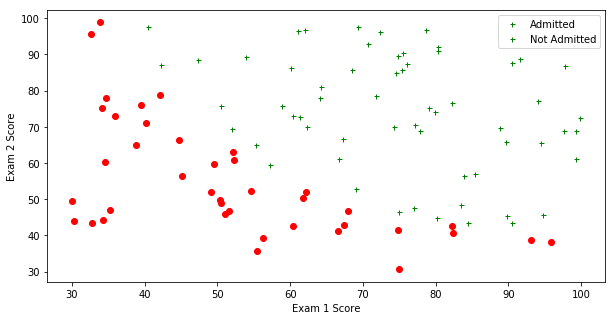

In [53]:
plot_data(X, Y)

In [9]:
X = np.hstack((np.ones((X.shape[0],1)), X))

![matrix.png](images/feature_matrix_for_digits.png)


In [10]:
X.shape

(100, 3)

In [11]:
Y = Y.reshape((Y.shape[0],1))

In [12]:
def initialise_theta(shape):
    theta = np.zeros(shape)
    return theta

In [13]:
theta = initialise_theta((X.shape[1],1))

In [14]:
theta.shape

(3, 1)

Defining a cost function which computes both cost and gradient

In [15]:
def sigmoid(Z):
#     sig = np.zeros(Z.shape)
    sig = 1/(1+ np.exp(-Z))
    return sig

In [16]:
def costFunction(theta, X, Y):
    m = len(Y)
    Z = np.dot(X, theta)
    hx = sigmoid(Z)
    J = 0
    grad = np.zeros(theta.shape)
    J = -np.sum(np.multiply(Y, np.log(hx)) + np.multiply((1-Y), np.log(1-hx)))/(m)
    grad = (np.dot(X.T, (hx - Y)))/m
    return (J, grad)

In [17]:
cost , grad = costFunction(theta, X, Y)

In [18]:
print("Cost at initial theta (zeros) is {}".format(cost))
print("Grad at initial theta (zeros) is {}".format(grad))

Cost at initial theta (zeros) is 0.6931471805599453
Grad at initial theta (zeros) is [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [19]:
grad.shape  # should be equal to theta shape

(3, 1)

In [20]:
test_theta = np.array([[-24], [0.2], [0.2]])

In [21]:
test_cost, test_grad = costFunction(test_theta, X, Y)

In [22]:
print("Cost with test theta is {}".format(test_cost))
print("Gradient with test theta is {}".format(test_grad))

Cost with test theta is 0.21833019382659785
Gradient with test theta is [[0.04290299]
 [2.56623412]
 [2.64679737]]


In [23]:
alpha = 0.001
num_of_iterations = 100

In [24]:
def gradient(theta, X, Y):
    Z = np.dot(X, theta)
    hx = sigmoid(Z)
    m = Y.shape[0]
    return (np.dot(X.T, (hx - Y)))/m

For large value of Z, the hx becomes 1 and thus in cost function log(1 - hx) = log(0) and thus causing runtime error<br>

In [25]:
def gradient1(X, Y, theta, alpha, num_of_iterations):
    m = len(Y)
    cost_array = np.zeros((num_of_iterations,1))
    for i in range(num_of_iterations):
#         cost, grad = costFunction(theta, X, Y)
        cost_array[i] = cost
        theta = theta - alpha*(grad)
    return (theta, cost_array)

This optimiseTheta function uses the <a href='https://docs.scipy.org/doc/scipy/reference/optimize.html'> scipy.optimize </a> library for optimising the value of theta while minimising the cost function. <br>
It uses<a href='https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_tnc.html'> scipy.optimize.fmin_tnc</a>.
This function also uses fprime=gradient (method name for calculating gradient)

In [26]:
def optimiseTheta(X, Y, theta):
    temp = opt.fmin_tnc(func = costFunction, x0 = theta.flatten(), args = (X, Y.flatten()))
    theta = temp[0]
    return theta

In [25]:
theta, cost_array = gradient1(X, Y, theta, alpha, num_of_iterations)

NameError: name 'gradient1' is not defined

In [ ]:
theta

In [27]:
theta = optimiseTheta(X, Y, theta)

In [28]:
theta

array([-25.16131864,   0.20623159,   0.20147149])

In [29]:
theta = np.array(theta)

In [30]:
theta.shape

(3,)

In [31]:
theta = theta.reshape((theta.shape[0],1))

In [33]:
theta.shape

(3, 1)

In [34]:
Z = np.dot(X, theta)
hx = sigmoid(Z)
J = -np.sum(np.multiply(Y, np.log(hx)) + np.multiply((1-Y), np.log(1-hx)))/(100)

In [35]:
J

0.20349770158947458

The equation of line will be theta0 + theta1x1 + theta2x2 = 0  (if number of features =2)
plotting this line equation by finding correspoinding value of other variable after fixing the first variable

Taking min and max values for X1 as plot_x and calculating X2 as plot_y

In [36]:
def plotDecisionBoundary(theta, X, Y):
    m = Y.shape[0]
    if (X.shape[1] <=3):
        plot_x = [X[0, 1], X[m-1,1]]  #X1 values taking min and max values for creating line
        plot_y = -(theta[0] + theta[1]*plot_x)/theta[2]
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros(len(u), len(v))
        for i in range(1, len(u)+1):
            for j in range(1, len(v)):
                z[i][j] = np.dot(mapFeature(u[i], v[j]), theta)
        z = z.T
        plt.figure(figsize = (10,5))
        plt.contour(u, v, z, [0,0], linewidth=2)
    positive_indexes = np.where(Y==1)
    negative_indexes = np.where(Y==0)
    plt.figure(figsize = (10,5))
    plt.plot(plot_x, plot_y, '-r')
    plt.plot(X[positive_indexes,1], X[positive_indexes,2], 'g+', markersize = 5)
    plt.plot(X[negative_indexes,1], X[negative_indexes,2], 'ro' )
    plt.legend(labels = ['Admitted','Not Admitted'], loc =1)
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.show()

<a href= 'https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.around.html'>np.round()</a> function is used to round the floating point number to integer. It rounds the middle value (0.5,1.5,2.5) to the even value

In [38]:
def predict(theta, X):
    m = X.shape[0]
    pred_matrix = np.zeros((m,1))
    pred_matrix = np.round(sigmoid(np.dot(X, theta)))
    return pred_matrix

calculating the accuracy of model based on rule(np.round) that $p >0.5 =1 and p<=0.5=0$

In [40]:
np.mean((predict(theta,X) == Y)*100)

89.0

Mapping features to higher dimensional polynomial features <br>
$X1, X2, X1^{2}, X2^{2}, X1*X2, (X1*X2)^{2}, etc..$

In [ ]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0]))
    for i in range(1, degree):
        for j in range(i):
            
            

In [ ]:
theta0 = np.repeat(theta[0], 100)

In [ ]:
theta0 = theta0.reshape((100,1))

In [ ]:
theta_reduced = np.array(theta[1:,:])

In [ ]:
theta_reduced

In [ ]:
-theta_reduced

In [ ]:
X_reduced = np.array(X[:, 1:])

In [ ]:
X_reduced.shape

In [ ]:
plt.plot(np.dot(X_reduced, theta_reduced), -(theta0), '-r')

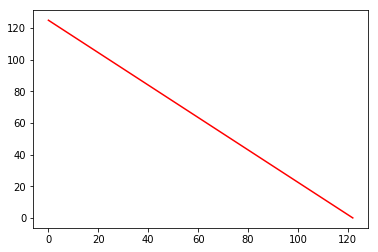

In [56]:
X1 = 0
Y1 = -(theta[0]/theta[2])
X2 = 0
Y2 = -(theta[0]/theta[1])
plot_x = [X1,Y2]
plot_y = [Y1, X2]
plt.plot(plot_x, plot_y, '-r')

Since decision boundary is $\theta_0 + \theta_1*X1 + \theta_2*X2=0$
plotting a 2-D line we need to set up values for X1 and X2
<table>
    <tr>
        <th>X1</th>
        <th>X2</th>
    </tr>
    <tr>
        <td>0</td>
        <td>124.88774022</td>
    </tr>
    <tr>
        <td>122.00516323</td>
        <td>0</td>
    </tr>

Plotting a 2-D line, putting value of one variable and getting second one

In [ ]:
Y1

In [ ]:
Y2

In [46]:
[X[0, 1], X[99,1]]

[34.62365962451697, 74.77589300092767]

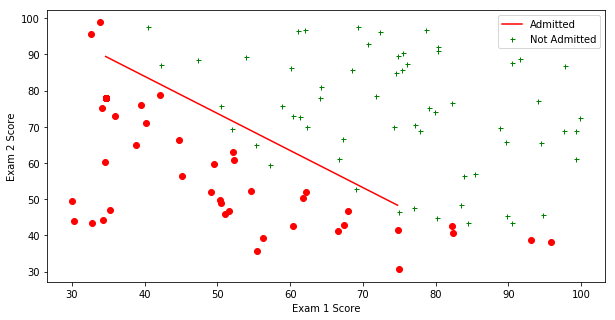

In [37]:
plotDecisionBoundary(theta, X, Y)

In [53]:
X.shape

IndexError: tuple index out of range

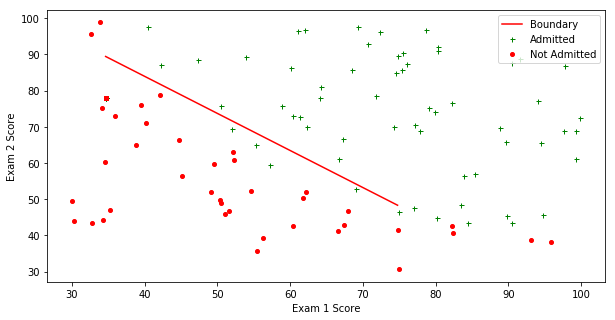

In [44]:
    m = Y.shape[0]
    if (X.shape[1] <=3):
        plot_x = [X[0, 1], X[m-1,1]]  #X1 values taking min and max values for creating line
        plot_y = -(theta[0] + theta[1]*plot_x)/theta[2]
    else:
        pass
    positive_indexes = np.where(Y==1)
    negative_indexes = np.where(Y==0)
    plt.figure(figsize = (10,5))
    a = plt.plot(plot_x, plot_y, '-r')
    b = plt.plot(X[positive_indexes,1], X[positive_indexes,2], 'g+', markersize = 5)
    c = plt.plot(X[negative_indexes,1], X[negative_indexes,2], 'ro', markersize = 4 )
    plt.legend((a[0], b[0], c[0]), ('Boundary','Admitted','Not Admitted'), loc =1)
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.show()

In [59]:
test_example = np.array([[1, 45, 85]])
prob = sigmoid(np.dot(test_example, theta))

if prob >= 0.5:<br>
    prob >= 0.5 => the example belongs to class '1' <br>
else:<br> 
    example belongs to class '0'

In [60]:
prob  # The example belongs to positive class

array([[0.77629062]])

In [58]:
theta

array([[-25.16131864],
       [  0.20623159],
       [  0.20147149]])